# Using MITGCM data

In this example we will generate structure functions from MITGCM ECCO data. 

**General procedure:**

1. Load data
2. Format data
3. Calculate structure functions
4. Plot structure functions

In [1]:
import warnings

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
import seaborn as sns
import xarray as xr
from geopy.distance import great_circle

import fluidsf

warnings.filterwarnings("ignore")  # Ignore warnings for the purpose of this tutorial

sns.set_style(style="white")
sns.set_context("talk")
matplotlib_inline.backend_inline.set_matplotlib_formats("png", dpi=200)

## Load the ECCO file and vizualize the data

We will use `xarray` to load the `nc` file. The file used in this example is in the Antarctic Circumpolar Current. We select `time=0` and `k=0` to get one snapshot of the simulation and the surface velocities.

**Note**: The ECCO data is not provided in the FluidSF repository, so you must instead access the data through [PO.DAAC](https://podaac.jpl.nasa.gov/dataset/MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0) or other methods. 

In [2]:
ds = xr.open_dataset("/path/to/ecco/data.nc")

In [3]:
ds = ds.isel(time=0, k=0)

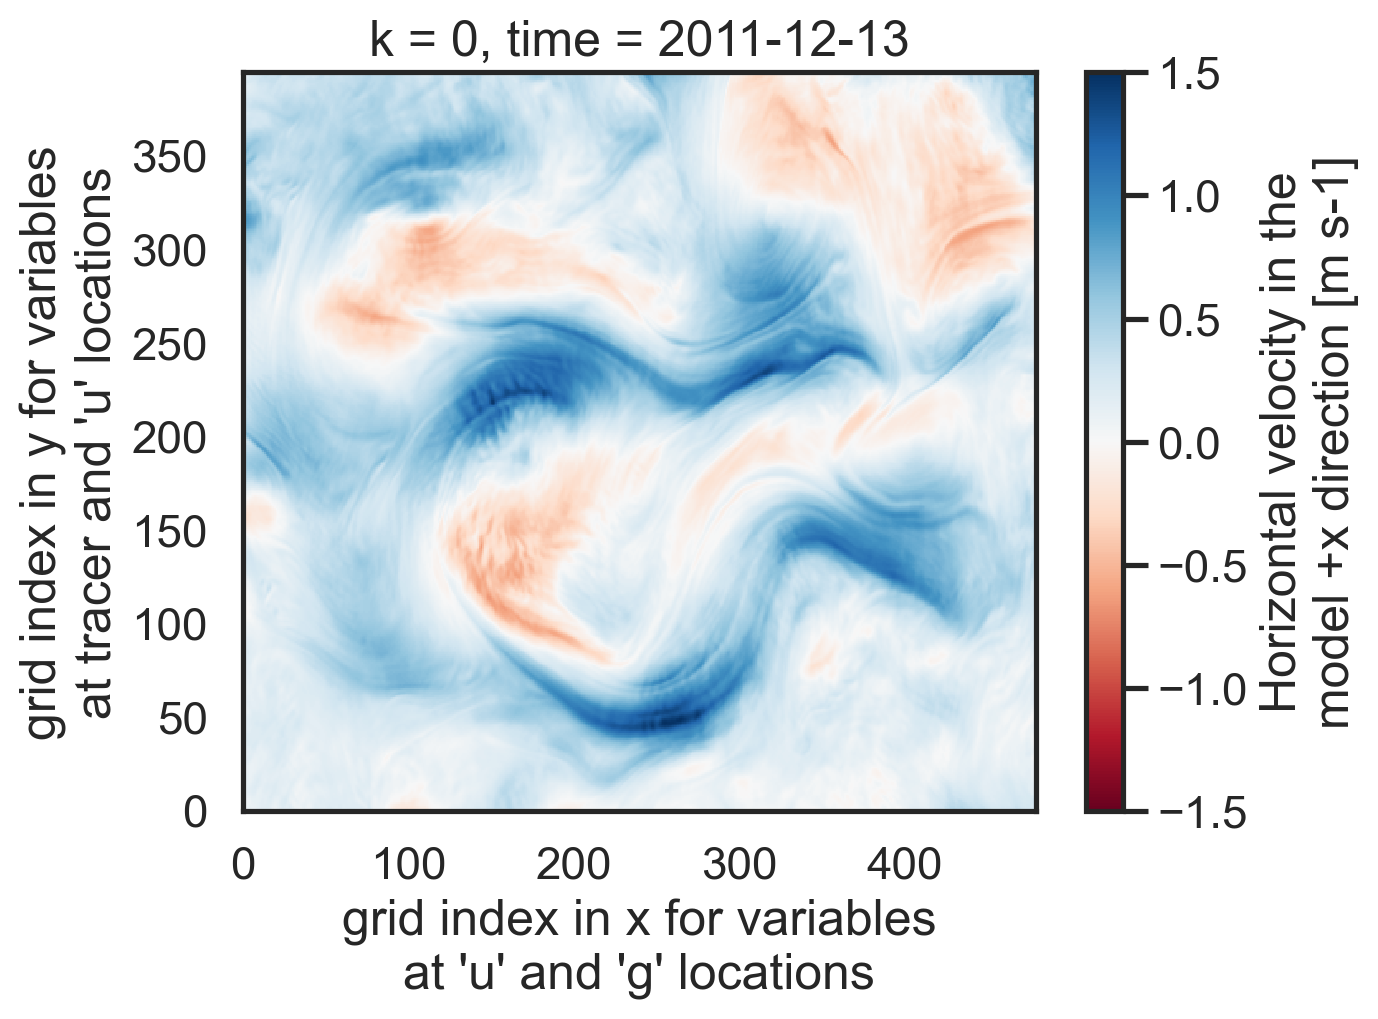

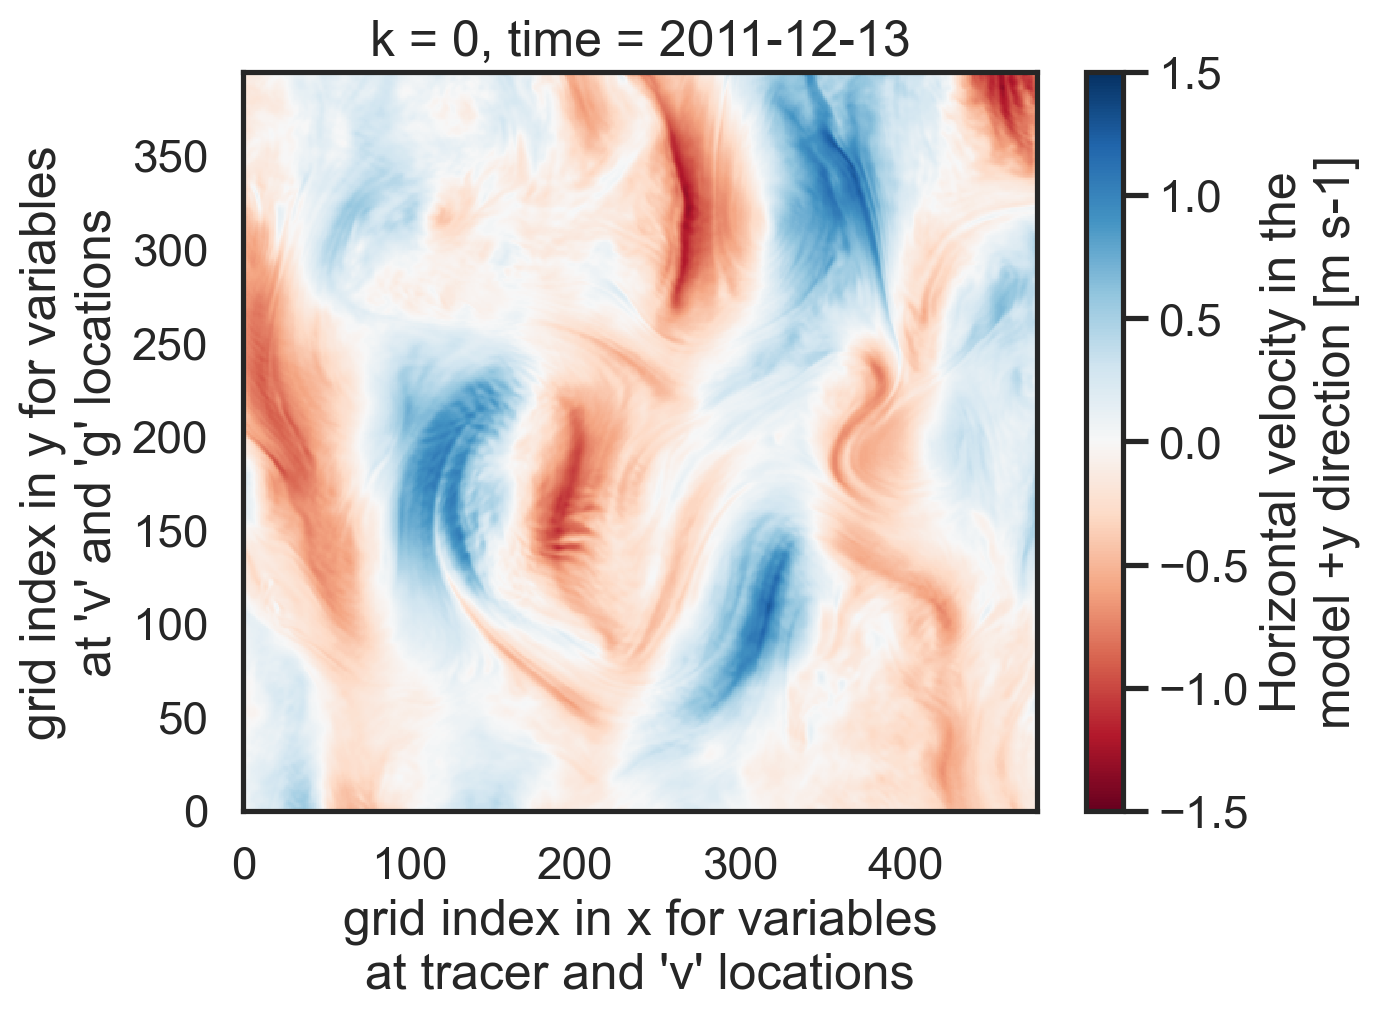

In [4]:
ds.U.plot.pcolormesh(cmap="RdBu", vmin=-1.5, vmax=1.5)
plt.show()

ds.V.plot.pcolormesh(cmap="RdBu", vmin=-1.5, vmax=1.5)
plt.show()

## Calculate structure functions

For data in latitude-longitude format, FluidSF expects 2D arrays of latitudes (`lats`) and longitudes (`lons`). 

Binning is required and FluidSF will set `nbins` by default to the length of the smallest spatial dimension. Here we set `nbins=100`.

In [5]:
sf = fluidsf.generate_structure_functions(
    u=ds.U.values,
    v=ds.V.values,
    lons=ds.XC.values,
    lats=ds.YC.values,
    sf_type=["ASF_V", "LLL"],
    boundary=None,
    grid_type="latlon",
    nbins=100,
)

## Plot the structure functions with cascade rate scaling

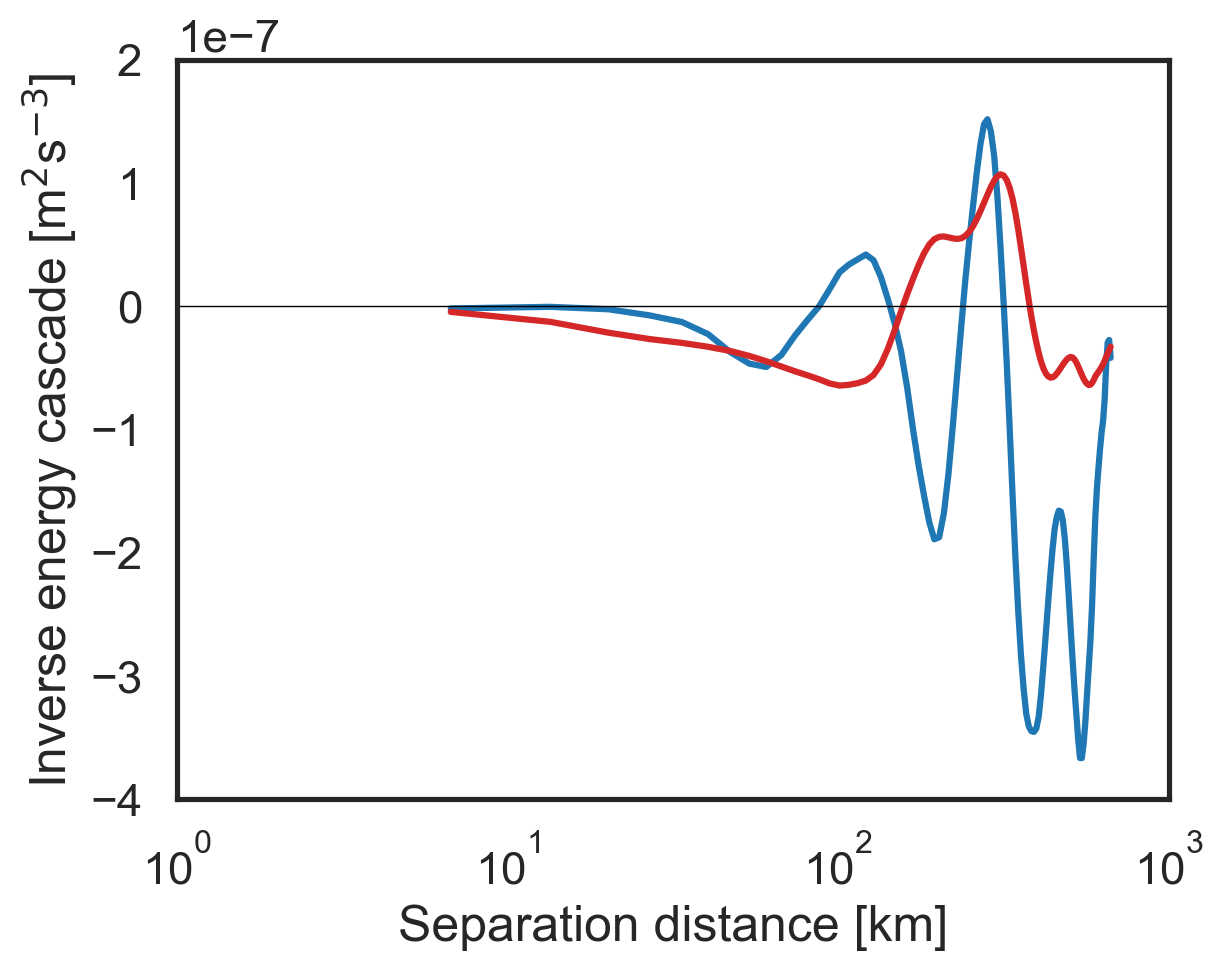

In [6]:
plt.semilogx(
    sf["x-diffs"] / 1e3,
    sf["SF_advection_velocity_x"] / 2,
    color="tab:blue",
    label="ASF$_V$",
)

plt.semilogx(
    sf["x-diffs"] / 1e3,
    2 * sf["SF_LLL_x"] / (3 * sf["x-diffs"]),
    color="tab:red",
    label="SF$_{LLL}$",
)

plt.xlabel("Separation distance [km]")
plt.ylabel("Inverse energy cascade [m$^2$s$^{-3}$]")
plt.xlim(1e0, 1e3)
plt.ylim(-4e-7, 2e-7)
plt.hlines(0, 1e0, 1e3, color="black", lw=0.5);